## Alejo Vinluan (abv210001)

# Image Classification

## Overview

This assignment explores image classification in Keras. It uses a sequential model to evaluate the test data. This is repeated with different architectures such as RNN and CNN for evaluation. Finally, a pretrained model is used for classification. 

## Dataset 

The dataset utilized is Animal Crossing vs Doom. Doom and Animal Crossing are video games with different art styles in that Animal Crossing is a relaxing game where you design an island and Doom is a First Person Shooter where you slay hordes of demons. 

In this instance, we will use classification so that

* Doom - 0

* Animal Crossing - 1

source: https://www.kaggle.com/datasets/andrewmvd/doom-crossing?resource=download&select=animal_crossing

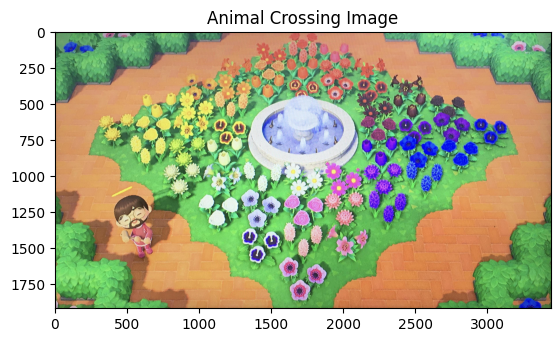

In [17]:
# An example of Animal Crossing
import matplotlib.pyplot as plt

img = plt.imread('data/animal_crossing/0czcmw8rmsz41.jpg')

plt.title("Animal Crossing Image")
plt.imshow(img)
plt.show()

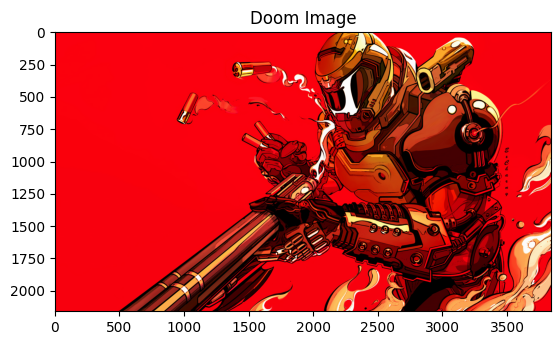

In [18]:
# An example of Doom
img = plt.imread('data/doom/a46ep8c89jq41.jpg')

plt.title("Doom Image")
plt.imshow(img)
plt.show()

In [19]:
# Prepare the dataset
import os
import pandas as pd
import cv2


animal_crossing_csv = pd.read_csv('./data/animal_crossing_dataset.xls')
doom_csv = pd.read_csv('./data/doom_dataset.xls')

# Prepare x-axis for images and y-axis for labels
x = []
y = []

# Gather images from directories
animal_crossing_images = os.listdir('data/animal_crossing')
doom_images = os.listdir('data/doom')

# Prepare all Animal Crossing images
for file_name in animal_crossing_images:
    image_path = 'data/animal_crossing/' + file_name
    try:
        # Use OpenCV to read the image
        img_arr = cv2.imread(image_path)
        # Convert the image to greyscale
        grayscale_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        # Resize the array
        resized_arr = cv2.resize(grayscale_arr, (224, 224))
        x.append(resized_arr)
        y.append('animal_crossing')
    except Exception:
        pass

# Prepare all Doom images
for file_name in doom_images:
    image_path = 'data/doom/' + file_name
    try:
        # Use OpenCV to read the image
        img_arr = cv2.imread(image_path)
        # Convert the image to greyscale
        grayscale_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        # Resize the array
        resized_arr = cv2.resize(grayscale_arr, (224, 224))
        x.append(resized_arr)
        y.append('doom')
    except Exception:
        pass

## Class Distribution

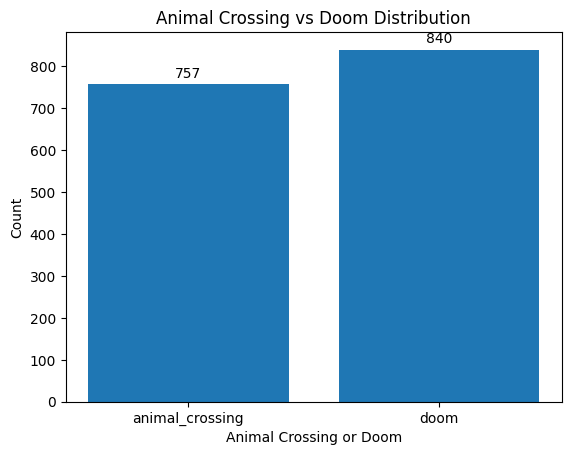

In [20]:
# Create a counter of each of the labels
y_counter = {}

for label in y:
    if label not in y_counter:
        y_counter[label] = 1
    else:
        y_counter[label] += 1
        
# Create a bar graph of each of the counts
figure, bar_graph = plt.subplots()
bars = bar_graph.bar(['animal_crossing', 'doom'], [y_counter['animal_crossing'], y_counter['doom']])
bar_graph.set_xlabel('Animal Crossing or Doom')
bar_graph.set_ylabel('Count')
bar_graph.set_title('Animal Crossing vs Doom Distribution')

# Create the labels above the bar graphs
for bar in bars:
    height = bar.get_height()
    bar_graph.annotate(str(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

According to the graph, we have a total of 757 Animal Crossing images and 840 Doom images.

## Data Preparation

This section will split the data into training and testing, transform the values into floating-point data, and convert the labels into categorical sections.

In [21]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

# Convert the data into floating-point data
x_train = np.divide(x_train, 255.)
x_test = np.divide(x_test, 255.)

# Convert y into 0 or Doom and 1 for Animal Crossing
y_train = [0 if label == 'doom' else 1 for label in y_train]
y_test = [0 if label == 'doom' else 1 for label in y_test]

# Convert the class vectors into binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, len(set(y)))
y_test = tf.keras.utils.to_categorical(y_test, len(set(y)))

## Sequential Model

This section will create a Sequential model utilizing Keras.

In [22]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(224, 224)),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(len(set(y)), activation='softmax'),
])

model.summary()

model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               25690624  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 25,954,306
Trainable params: 25,954,306


In [23]:
history = model.fit(x_train, y_train,      
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
10/10 [==============================] - 3s 205ms/step - loss: 52.6469 - accuracy: 0.5012 - val_loss: 1.6078 - val_accuracy: 0.4969
Epoch 2/20
10/10 [==============================] - 2s 189ms/step - loss: 2.0523 - accuracy: 0.5051 - val_loss: 0.6840 - val_accuracy: 0.5188
Epoch 3/20
10/10 [==============================] - 2s 190ms/step - loss: 1.0315 - accuracy: 0.5380 - val_loss: 0.6702 - val_accuracy: 0.6250
Epoch 4/20
10/10 [==============================] - 2s 189ms/step - loss: 0.6810 - accuracy: 0.5568 - val_loss: 0.6763 - val_accuracy: 0.6156
Epoch 5/20
10/10 [==============================] - 2s 191ms/step - loss: 0.7454 - accuracy: 0.5489 - val_loss: 0.6852 - val_accuracy: 0.5125
Epoch 6/20
10/10 [==============================] - 2s 193ms/step - loss: 0.6984 - accuracy: 0.5356 - val_loss: 0.6902 - val_accuracy: 0.5375
Epoch 7/20
10/10 [==============================] - 2s 191ms/step - loss: 0.7264 - accuracy: 0.5247 - val_loss: 0.6935 - val_accuracy: 0.5094
Epoch

The model has returned a Loss of 69% and an Accuracy of 51.2%. There is about a 69% error rate between the predicted output and the true output. The model is only correct about 51% of the time as well.

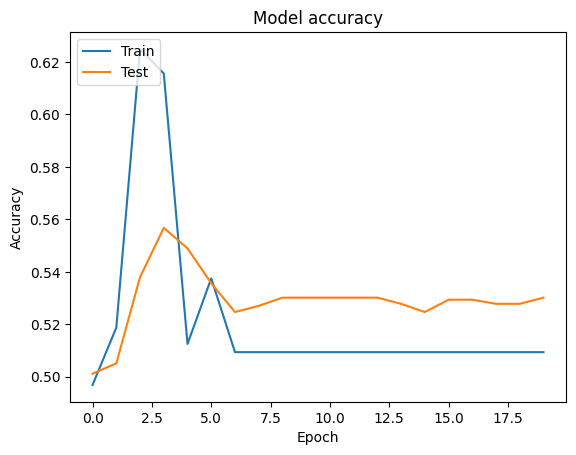

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## RNN Architecture

RNN's are recurrent neural networks. These models are generally used for time series or natural languages. An RNN layer utilizes a for loop to iterate over the timesteps in a sequence. It maintains an internal state that encodes information about the timesteps it's had so far.

In [25]:
model = tf.keras.models.Sequential([
tf.keras.layers.SimpleRNN(64, input_shape=(224,224)),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(len(set(y)), activation='softmax'),
])

model.summary()

model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                18496     
                                                                 
 dense_11 (Dense)            (None, 512)               33280     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 315,458
Trainable params: 315,458
Non-tr

In [26]:
history = model.fit(x_train, y_train,      
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
10/10 [==============================] - 2s 106ms/step - loss: 0.7928 - accuracy: 0.5106 - val_loss: 0.6743 - val_accuracy: 0.5813
Epoch 2/20
10/10 [==============================] - 1s 72ms/step - loss: 0.6721 - accuracy: 0.5724 - val_loss: 0.6516 - val_accuracy: 0.6062
Epoch 3/20
10/10 [==============================] - 1s 72ms/step - loss: 0.6801 - accuracy: 0.6155 - val_loss: 0.6490 - val_accuracy: 0.6281
Epoch 4/20
10/10 [==============================] - 1s 72ms/step - loss: 0.6377 - accuracy: 0.6366 - val_loss: 0.6982 - val_accuracy: 0.5813
Epoch 5/20
10/10 [==============================] - 1s 71ms/step - loss: 0.6552 - accuracy: 0.6108 - val_loss: 0.6461 - val_accuracy: 0.6281
Epoch 6/20
10/10 [==============================] - 1s 71ms/step - loss: 0.6780 - accuracy: 0.6006 - val_loss: 0.6596 - val_accuracy: 0.6281
Epoch 7/20
10/10 [==============================] - 1s 70ms/step - loss: 0.6326 - accuracy: 0.6249 - val_loss: 0.6386 - val_accuracy: 0.6281
Epoch 8/20
1

The test loss...... [write stuff here]

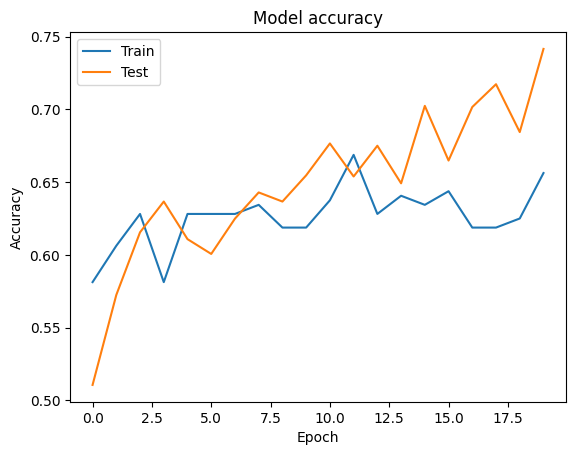

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The model accuracy chart shows...

## CNN Architecture

In [28]:
model = tf.keras.models.Sequential([
tf.keras.Input(shape=(224,224,1)),
tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(2, activation="softmax"),
])

model.summary()

model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 186624)            0         
                                                                 
 dropout_10 (Dropout)        (None, 186624)           

In [29]:
history = model.fit(x_train, y_train,      
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
10/10 [==============================] - 21s 2s/step - loss: 2.5655 - accuracy: 0.5027 - val_loss: 0.7150 - val_accuracy: 0.5125
Epoch 2/20
10/10 [==============================] - 20s 2s/step - loss: 0.6503 - accuracy: 0.6194 - val_loss: 0.6837 - val_accuracy: 0.6125
Epoch 3/20
10/10 [==============================] - 20s 2s/step - loss: 0.6288 - accuracy: 0.7016 - val_loss: 0.6504 - val_accuracy: 0.6406
Epoch 4/20
10/10 [==============================] - 20s 2s/step - loss: 0.6061 - accuracy: 0.7103 - val_loss: 0.6400 - val_accuracy: 0.6844
Epoch 5/20
10/10 [==============================] - 20s 2s/step - loss: 0.6266 - accuracy: 0.7478 - val_loss: 0.6475 - val_accuracy: 0.6687
Epoch 6/20
10/10 [==============================] - 20s 2s/step - loss: 0.4997 - accuracy: 0.7839 - val_loss: 0.6219 - val_accuracy: 0.7094
Epoch 7/20
10/10 [==============================] - 20s 2s/step - loss: 0.5040 - accuracy: 0.7768 - val_loss: 0.6249 - val_accuracy: 0.6875
Epoch 8/20
10/10 [==

The test loss is substantially high at

The history graph shows

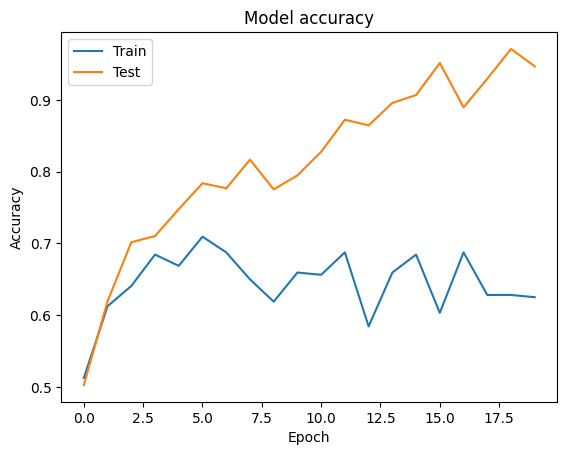

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Pretrained Model (VGG-16)

VGG-16 was developed at the University of Oxford and is one of the most popular models used. VGG-16 will attempt to predict a completely different video game, Minecraft.

In [31]:
from keras.applications.vgg16 import VGG16

model = VGG16()
model.summary()

553467096/553467096 [==============================] - 11s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

### An Example of Minecraft

This will be the image of Minecraft that VG16 will attempt to predict.

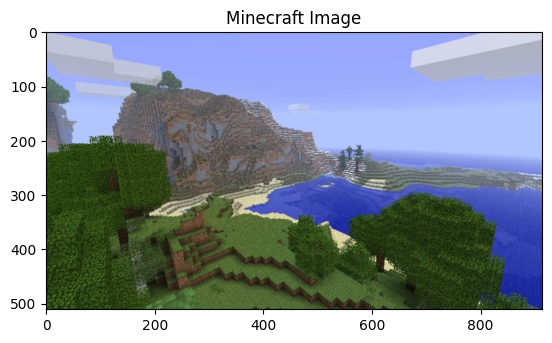

In [33]:
img = plt.imread('data/minecraft_image.jpg')

plt.title("Minecraft Image")
plt.imshow(img)
plt.show()

In [38]:
# load an image
image = tf.keras.utils.load_img('data/minecraft_image.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])

# Predict what the image is
predictions = model.predict(input_arr)

image_prediction = tf.keras.applications.vgg16.decode_predictions(predictions, top=5)
image_prediction

35363/35363 [==============================] - 0s 0us/step


[[('n03598930', 'jigsaw_puzzle', 0.16339023),
  ('n09193705', 'alp', 0.13127784),
  ('n09246464', 'cliff', 0.09332522),
  ('n03781244', 'monastery', 0.06552275),
  ('n04346328', 'stupa', 0.06209536)]]

According to VGG16, the top 5 predictions of the Minecraft image are jigsaw_puzzle, alp, cliff, monastery, and stupa.


## Analysis of the Performance of Different Approaches